##  한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy(코엔알파이) : **pip install konlpy --user**
    * https://konlpy-ko.readthedocs.io/ko/v0.4.3/
* JPype1 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * JAVA가 설치된 프로그램 폴더 기준 : 
       C:\Program Files\Java\jre1.8.0_261\bin
       환경변수로 설정
    * java -version
* nltk 설치 : 터미널 모드에서 python 
    *  import nltk
    *  nltk.download()
* wordcloud 설치 : pip install worldcloud
* gensim 설치 : pip install gensim --user
* tensorflow 설치 : pip install tensorflow --user

In [2]:
# !pip list

## 한글 자연어 처리 기초

### 꼬꼬마말뭉치
    * http://kkma.snu.ac.kr/documents/
    
- Kkma 메소드 
```
    kkma객체.sentences() : 문장 분석 
    kkma객체.pos() : 형태소 분석 
    kkma객체.nouns() : 단어 분석 
```

In [1]:
# konlpy 에서 Kkma 모듈 불러오기 
from konlpy.tag import Kkma

In [2]:
# kkma 객체 만들기 
kkma = Kkma()

In [3]:
# 문장 분석
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [4]:
# 단어 분석
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

### 형태소분석표 
http://kkma.snu.ac.kr/documents/index.jsp?doc=postag

In [5]:
# 형태소 분석
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [6]:
kkma.pos('오늘도 좋은 하루')

[('오늘', 'NNG'), ('도', 'JX'), ('좋', 'VA'), ('은', 'ETD'), ('하루', 'NNG')]

### 한나눔
    * https://konlpy-ko.readthedocs.io/ko/v0.4.3/api/konlpy.tag/
    
- hannanum 메소드 
```
    hannanum객체.nouns() : 단어 분석 
    hannanum.morphs : 형태소를 리스트로 반환 
    hannanum.pos : 형태소 분석 
```

In [7]:
# 모듈 임포트
from konlpy.tag import Hannanum


In [8]:
# 객체 생성 
hannanum = Hannanum()

In [9]:
# 단어 분석
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [10]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [11]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

### 트위터 분석기 
    * https://github.com/twitter/twitter-korean-text
    
- 트위터 분석기 메소드 
```
    트위터객체.nouns() : 단어 분석 
    트위터객체.morphs : 형태소를 리스트로 반환 
    트위터객체.pos : 형태소 분석 
```

In [144]:
# 모듈 임포트
from konlpy.tag import Twitter


In [145]:
# 객체 생성
t = Twitter()

In [146]:
# 단어 분석
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [147]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [19]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

# 글 파일에서 명사만 출력하기 


In [169]:
from konlpy.tag import Twitter

f = open("data/little_price.txt", 'r')

lines = f.readlines()

twitter = Twitter()
word_dic = {}

for line in lines:
    malist = twitter.pos(line)
    for word in malist:
        if word[1] == "Noun": 
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1 
            
            
# 많이 사용된 명사 출력하기 
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
for word, count in keys[:50]:
    print("{0}({1}) ".format(word, count))
print()            

그(421) 
말(233) 
것(202) 
왕자(183) 
나(179) 
내(136) 
사람(133) 
별(131) 
꽃(103) 
수(76) 
그것(56) 
이(55) 
난(54) 
다시(54) 
생각(52) 
너(51) 
대답(50) 
때(49) 
네(44) 
알(42) 
아저씨(41) 
양(36) 
때문(34) 
왕(34) 
여우(34) 
해(33) 
일(33) 
그림(32) 
게(32) 
가로등(31) 
걸(29) 
아주(29) 
가지(28) 
하나(27) 
다른(27) 
더(27) 
거지(27) 
이야기(26) 
친구(26) 
아무(26) 
어른(25) 
건(25) 
날(24) 
명령(24) 
위(23) 
안녕(23) 
속(22) 
물(22) 
바오밥나무(22) 
번(21) 



##  워드 클라우드

- 워드 클라우드란(Word Cloud)란? 문서의 키워드, 개념 등을 직관적으로 파악할 수 있도록 핵심 단어를 시각적으로 돋보이게 하는 기법
* WordCloud 설치 : **pip install wordcloud**

In [174]:
from wordcloud import WordCloud
from konlpy.tag import Twitter 
from collections import Counter

In [192]:
# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.size'] = 20.0
# # plt.rcParams['font.family'] = 'batang'
# plt.rcParams['font.family'] = 'Malgun Gothic'

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'


In [193]:
file = open("data/little_price.txt", 'r') 
lists = file.readlines() 
file.close() 
# lists



In [194]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
#     print(morphs)


In [195]:
# 명사, 형용사, 부사만 골라내기

noun_adj_adv_list=[]
 
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word):
            noun_adj_adv_list.append(word)
            
# print(noun_adj_adv_list)


In [196]:
# 빈도수대로 정렬하기 

count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
# words


In [197]:
# 워드 클라우드 만들기 - 디스플레이 설정 

from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats

matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)



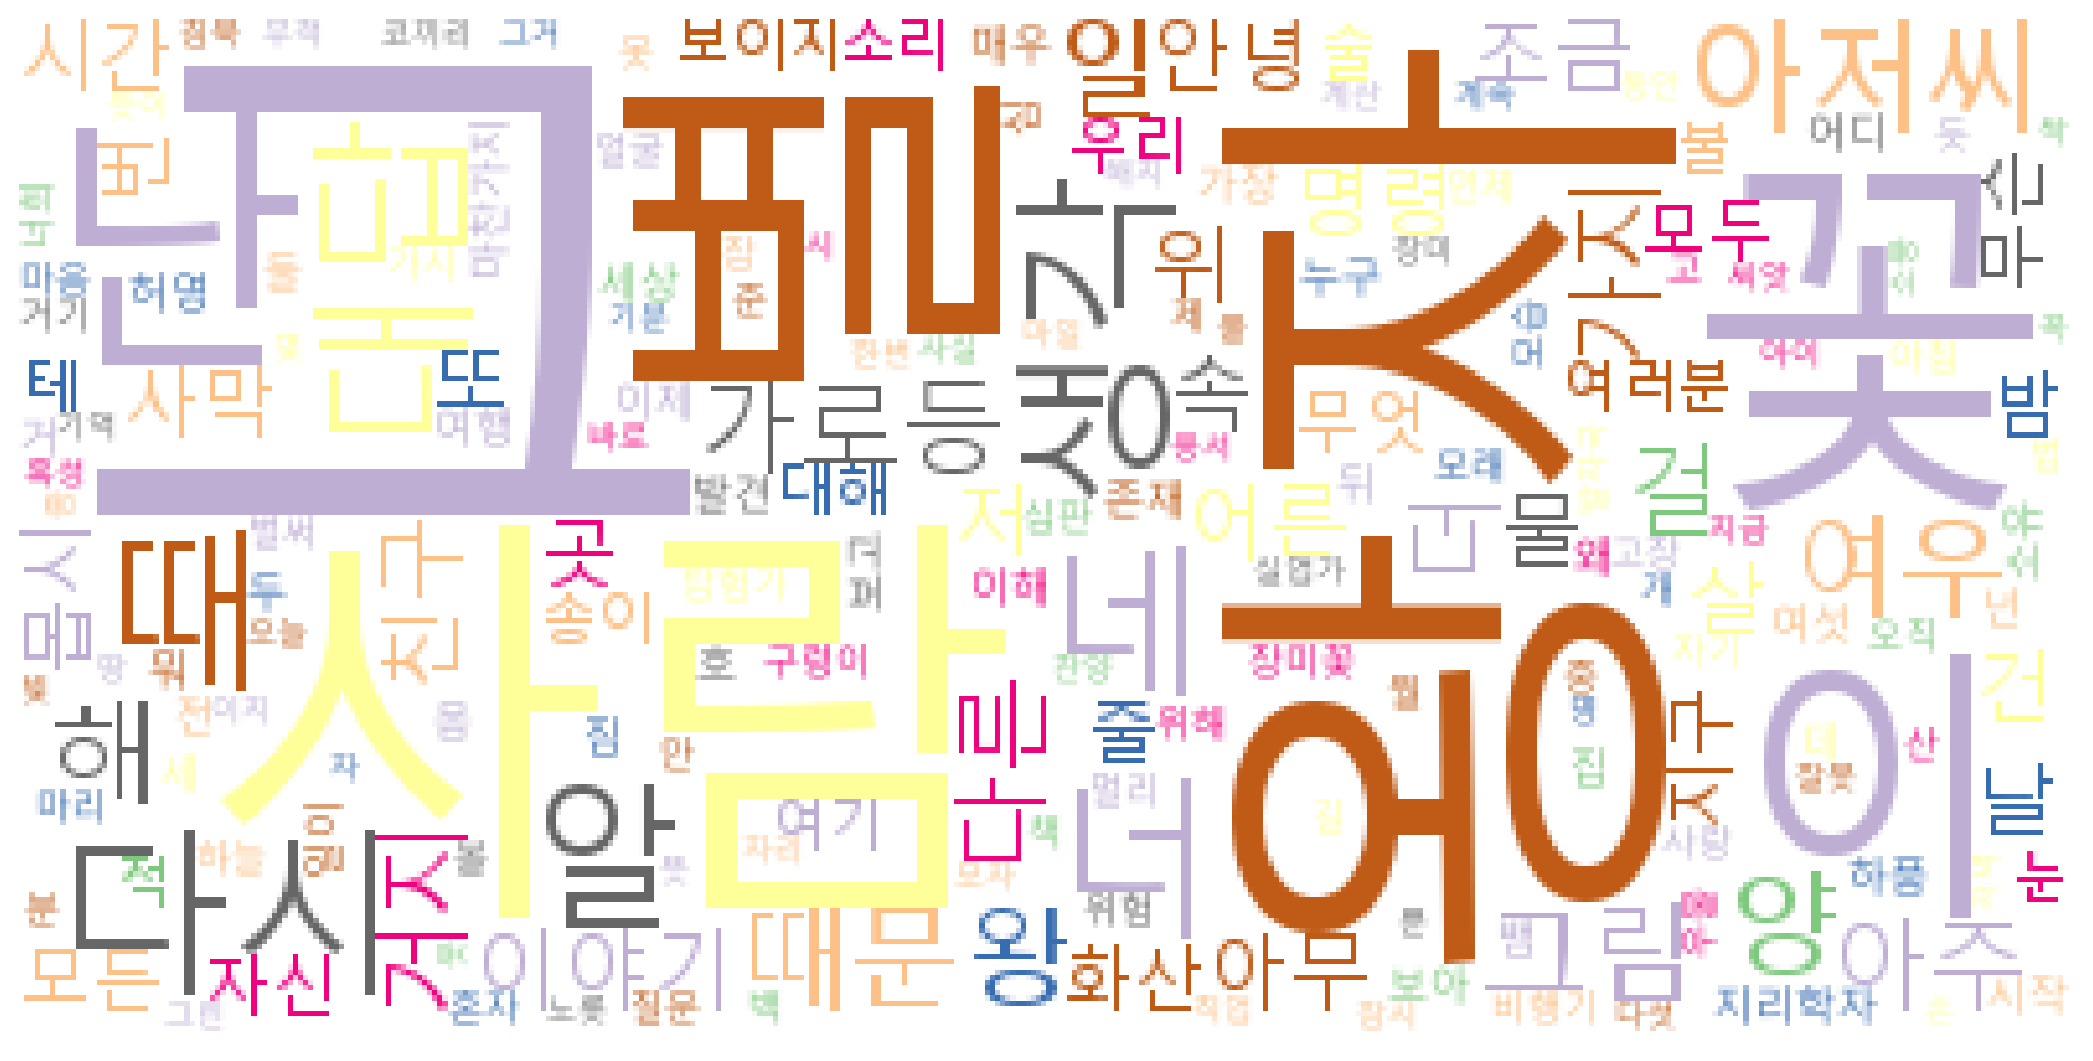

In [198]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',colormap = "Accent_r").generate_from_frequencies(words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

fig.savefig('tst.png', dpi=100)

In [199]:
%ls

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 5073-91EF

 C:\workspaceML\KoNLPy 디렉터리

2020-08-19  오전 01:25    <DIR>          .
2020-08-19  오전 01:25    <DIR>          ..
2020-08-19  오전 12:55    <DIR>          .ipynb_checkpoints
2020-08-18  오후 05:55    <DIR>          data
2020-08-18  오후 06:19           498,127 markov-toji.json
2020-08-19  오전 12:33           454,598 pres_girl.data
2020-08-19  오전 12:33         1,075,408 pres_girl.model
2020-08-19  오전 01:25            82,678 tst.png
2020-08-18  오후 06:22            17,348 Untitled.ipynb
2020-08-19  오전 01:25           706,434 분석기와 워드클라우드.ipynb
2020-08-19  오전 12:43         2,571,229 자연어처리.ipynb
               7개 파일           5,405,822 바이트
               4개 디렉터리  434,557,366,272 바이트 남음


## 마스킹 워드클라우드

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [3]:
text = open('data/alice.txt').read()
# text

In [4]:
# 엘리스그림 마스킹 객체 생성 
alice_mask = np.array(Image.open('data/alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm

#  한글글꼴로 변경
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.family'] = 'batang'
# plt.rcParams['font.family'] = 'Malgun Gothic'

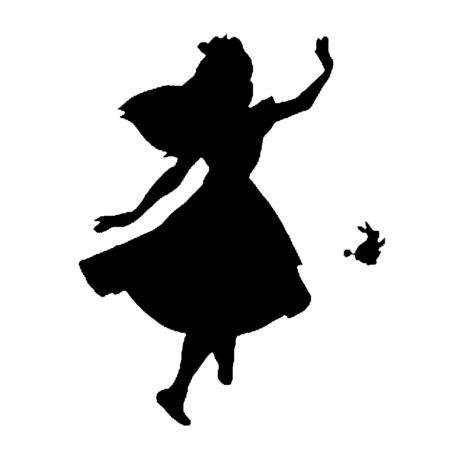

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
# 단어의 최빈값 리스트 
# wc.words_

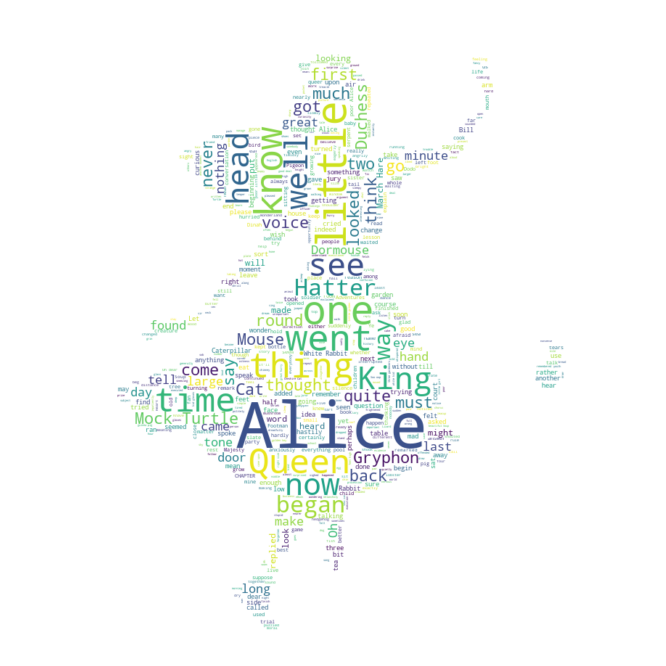

In [9]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 스타워즈 마스크

In [10]:
text = open('data/a_new_hope.txt').read()

#  특정 문자 교체                    
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/stormtrooper_mask.png'))

In [11]:
# 불용어 지정 
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [13]:
# 워드 클라우드 생성 
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [14]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

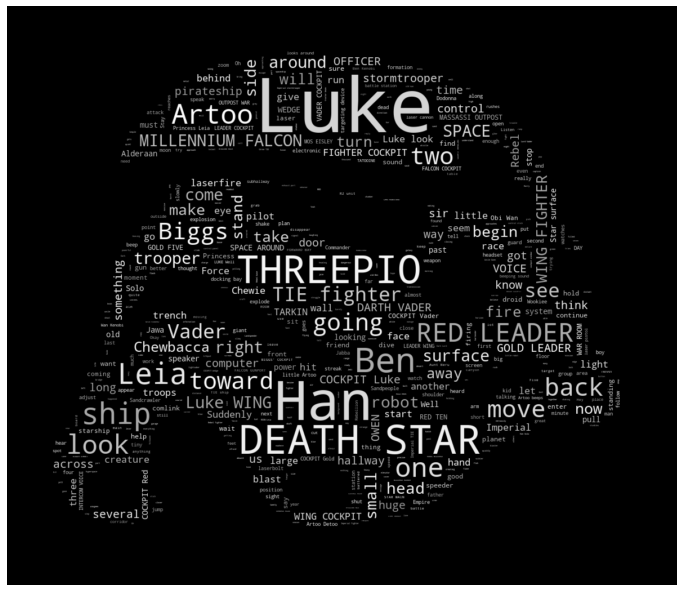

In [16]:
# 워드 클라우드 생성 
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()